In [87]:
import tensorflow as tf

In [88]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/home/griffith/main/machine_learning/beginning/.venv/lib/python3.11/site-packages/tensorflow/_api/v2/version/__init__.py'>


Creating tensors

In [89]:
string = tf.Variable("this is a string", tf.string) #rank 0
number = tf.Variable([324], tf.int64)
floating = tf.Variable(3.456, tf.float64)
print(string)
print(number)
print(floating)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>
<tf.Variable 'Variable:0' shape=(1,) dtype=int32, numpy=array([324], dtype=int32)>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.456>


Rank/Degree of tensors

In [90]:
rank_tensor = tf.Variable(["test"], tf.string) # rank 1
rank2_tensor = tf.Variable([["test","ok"],["test","yes"],["green","yellow"]], tf.string) #rank 2
print(rank_tensor)
print(rank2_tensor)

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'test'], dtype=object)>
<tf.Variable 'Variable:0' shape=(3, 2) dtype=string, numpy=
array([[b'test', b'ok'],
       [b'test', b'yes'],
       [b'green', b'yellow']], dtype=object)>


In [91]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [92]:
rank2_tensor.shape

TensorShape([3, 2])

Types of tensor \n
Variable \n
Constant \n
placeholder \n
sparse tensor

============================

##Linear Regression

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


(0.0, 6.0, 0.0, 20.0)

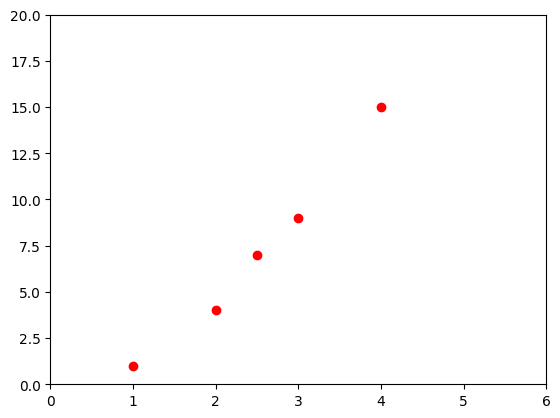

In [94]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, "ro")
plt.axis([0, 6, 0, 20])

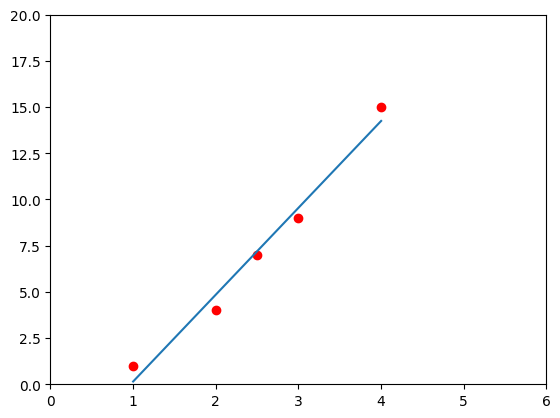

In [95]:
plt.plot(x,y,"ro")
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()


In [96]:
print(np.unique(x))
print(np.polyfit(x,y,1))
print(np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

[1.  2.  2.5 3.  4. ]
[ 4.7  -4.55]
[ 0.15  4.85  7.2   9.55 14.25]


In [97]:
from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import clear_output
import urllib
import tensorflow.compat.v2.feature_column as fc



In [98]:
#load dataset

dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dftrain.to_csv("titanic_train.csv",index=False)
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
dfeval.to_csv("titanic_test.csv", index=False)
y_train = dftrain.pop("survived")
y_eval = dfeval.pop('survived')

In [99]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [100]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [101]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<Axes: >

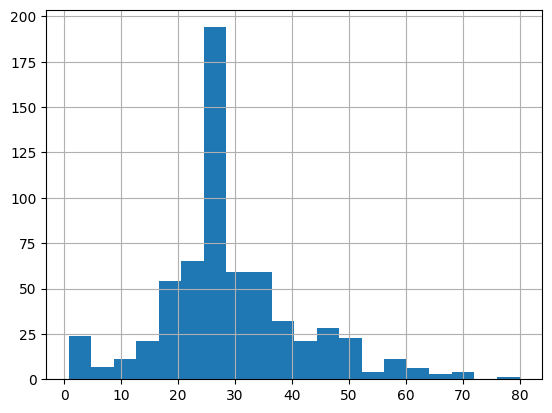

In [102]:
dftrain.age.hist(bins=20)

<Axes: xlabel='sex'>

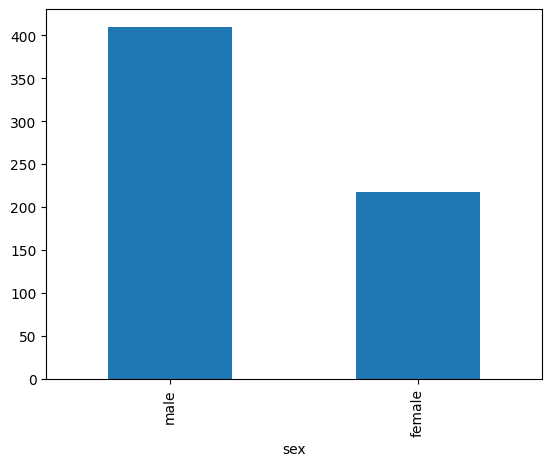

In [103]:
dftrain.sex.value_counts().plot(kind="bar")

<Axes: xlabel='class'>

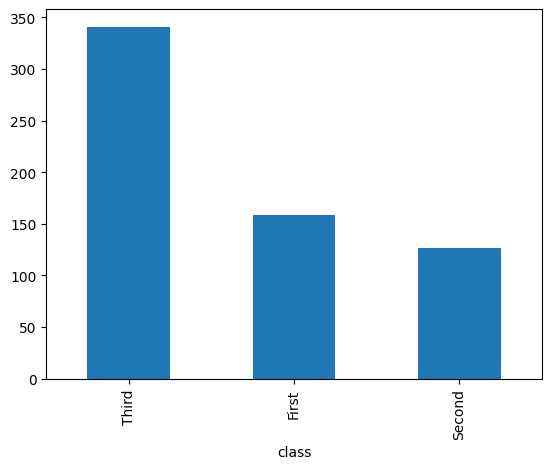

In [104]:
dftrain["class"].value_counts().plot(kind="bar")

Text(0.5, 0, '% survived')

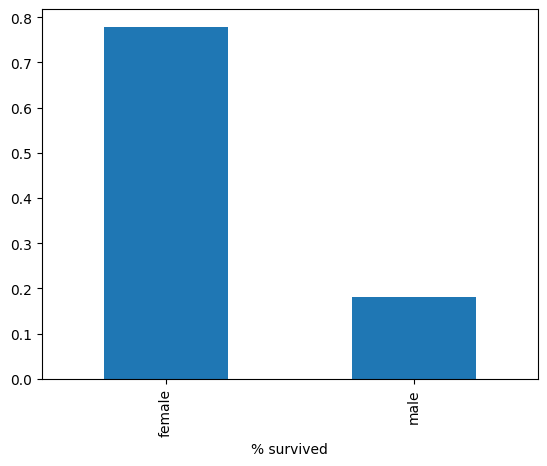

In [105]:
pd.concat([dftrain,y_train],axis=1).groupby("sex")["survived"].mean().plot(kind="bar").set_xlabel('% survived')

In [106]:
dftrain

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [107]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses','parch', 'class', 'deck','embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float64))
    
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [108]:
def make_input_fn(data_df, label_df, num_epochs=35, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpy481ruvu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [109]:
linear_est.train(train_input_fn)
result  = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])

0.7613636


In [110]:
result = list(linear_est.predict(eval_input_fn))
clear_output()
print(result[0])


{'logits': array([-2.2608616], dtype=float32), 'logistic': array([0.09441668], dtype=float32), 'probabilities': array([0.9055834 , 0.09441667], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}


#Classification

In [111]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']


In [112]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [113]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [114]:
train_y = train.pop("Species")
test_y = test.pop("Species")

In [115]:
train.shape

(120, 4)

In [116]:
def input_fn(features,labels,training= True, batch_size = 256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)

In [117]:
my_feature_columns = []

for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key = key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [146]:
train_input_fn = lambda: input_fn(train, train_y, training=True)
eval_input_fn = lambda: input_fn(test, test_y, training=False)

feature_layer = tf.keras.layers.DenseFeatures(my_feature_columns)

model = tf.keras.Sequential([
    feature_layer,
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_input_fn(), epochs=10, steps_per_epoch=5000)

eval_result = model.evaluate(eval_input_fn())

Epoch 1/10


5000/5000 [==============================] - 19s 4ms/step - loss: 0.0725 - accuracy: 0.9804
Epoch 2/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0224 - accuracy: 0.9917
Epoch 3/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0191 - accuracy: 0.9917
Epoch 4/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.0179 - accuracy: 0.9917
Epoch 5/10
5000/5000 [==============================] - 14s 3ms/step - loss: 0.0171 - accuracy: 0.9917
Epoch 6/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0166 - accuracy: 0.9917
Epoch 7/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0162 - accuracy: 0.9917
Epoch 8/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0159 - accuracy: 0.9918
Epoch 9/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.0155 - accuracy: 0.9919
Epoch 10/10
1/1 [==============================] - 0s 416ms/step - loss: 0.4536 - ac

#Clustering

Hideen Marcov model

We will model a simple weather system and try to predict the temperature on each day given the following information.

   1 Cold days are encoded by a 0 and hot days are encoded by a 1.

   2 The first day in our sequence has an 80% chance of being cold.

   3 A cold day has a 30% chance of being followed by a hot day.

   4 A hot day has a 20% chance of being followed by a cold day.
   
   5 On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

If you're unfamiliar with standard deviation it can be put simply as the range of expected values.

In this example, on a hot day the average temperature is 15 and ranges from 5 to 25.

To model this in TensorFlow we will do the following.

In [160]:
import tensorflow_probability as tfp

In [161]:
tfd = tfp.distributions
initial_distrubution = tfd.Categorical(probs = [0.8,0.2])
transition_distribution = tfd.Categorical(probs = [[0.7, 0.3],
                                                   [0.2, 0.8]])
observation_distribution = tfd.Normal(loc = [0.,15.], scale = [5., 10.])

In [164]:
model = tfd.HiddenMarkovModel(
    initial_distribution= initial_distrubution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7
)

In [167]:
mean = model.mean()


with tf.compat.v1.Session() as sess:
    print(mean.numpy())

[3.        5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]
